

**Jupyter Notebook for Capstone 3 Project**


Student: **Robert Dolan**

Thinkful **Data Analytics Flex Program**


---


# The Dataset

The dataset chosen is "*Heart Attack Analysis and Prediction*", a public dataset obtained from the Kaggle website.

This dataset has 303 rows, each row representing a patient. Each row has 14 columns. Each column is a parameter relating to risk for heart attack except for the 14th column which is a Boolean value, representing whether the patient did or did not have a heart attack.

Here are the columns:

**Age :** Age of the patient 					
**Sex :** Sex of the patient (M, F)

**cp :** Chest pain type 

*   1: typical angina
*   2: atypical angina
*   3: non-anginal pain
*   4: asymptomatic

**trtbps :** resting blood pressure in mm Hg			
**chol :** cholesterol in mg/dL

**fbs:** fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**rest_ecg :** resting electrocardiographic results	
*   0: normal
*   1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
*   2: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach :** maximum heart rate achieved	
**exang:** exercise induced angina (1 = yes; 0 = no)	
**oldpeak:** ST depression induced by exercise relative to rest	
**slope:** the slope of the peak exercise ST segment

**ca:** number of major vessels (0-3)			
**thal:** thalium stres test (3 = normal; 6 = fixed defect; 7 = reversable defect0

**target:** 0 = less chance of event, 1 = more chance of heart attack	

# Preparing the data

---


The dataset was uploaded to Google Drive. The next step is to 
mount the drive as per instructions by Google.

In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next, we will import the Python libraries needed for analysis and visualization.

Warnings are turned off for readability, and Seaborn style parameters are set.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

# turn off warnings
import warnings
warnings.filterwarnings('ignore')


Now the dataset will be loaded into a Pandas dataframe.

In [4]:
# Load the dataset from Google Drive into a pandas dataframe
df = pd.read_csv('/content/gdrive/My Drive/Colab_Datasets/heart.csv')

# Preliminary analysis of the dataset


---


We will look at the shape (how many rows and columns) of the dataset.
We will use the pandas df.info(), df.head(), and df.describe() methods to get an overview of the data.


In [5]:
# Finding the shape of the dataset
print('The shape of dataset in rows and columns:',df.shape)

The shape of dataset in rows and columns: (303, 14)


df.info() gives us information about the number of non-null values and the dtype of each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


df.head() will show us the first 5 columns of data

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


df.describe() gives us basic descriptive statistics for each column.

In [8]:
# Basic descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Next, we need to find and address null values.

In [9]:
# Finding null values in the dataset
df.isnull().sum()
print('There are', df.isna().sum().sum(), 'Null values in dataset')

There are 0 Null values in dataset


Great! There are no null values in this dataset, so we do not need to do anything further here.

Now we will show which columns have categorical data and which have numerical data.

In [10]:
# Show which columns have categorical data
cat_col = [i for i in df.columns if df[i].nunique()<10]
print('Categorical fields in the dataset are:',cat_col)
print('\n')

# Show which columns have numerical data
num_col = [i for i in df.columns if df[i].nunique()>10]
print('Numerical fields in the dataset are:',num_col)

Categorical fields in the dataset are: ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


Numerical fields in the dataset are: ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


We will define subset dataframes to capture each subset of categorical and numerical data. These will be useful later.

In [11]:
# Classifying data into numerical and categorical features.
data_numerical = df[['age','trtbps','chol','thalachh','oldpeak']]
data_categorical = df[['sex','cp','fbs','restecg','exng','slp','caa','thall','output']]

One of the first things we can do to investigate possible interesting relationships between the data is to plot a correlation matrix using a heatmap.

We would look for strong positive and negative correlations as a basis for hypothesis generation. 
Another use would be if there is a conflict between the correlation data and the established theory, to investigate why that might be the case.

For example in this data, there is a -0.44 correlation between having exercise induced angina and having a heart attack. This is considered a low negative correlation.
This is a bit strange as it seems counter-intuitive to the established theory, however there are at least 3 possible explanations:
1. The dataset is too small, or not sampled properly, and doesn't represent the population of interest.
2. There may be a valid clinical explanation. If many of these patients are diabetics, diabetics often do not experience typical anginal pain due to neuropathy. 
The dataset certainly does contain a fair number of diabetics (45 out of 303, see code in following code window). This would be my most likely hypothesis to explain the discrepancy because the correlation is only a weakly negative one, on a relatively small dataset.
3. This data has revealed a result that will turn the theory on it's head! (Not likely, because the dataset is rather small, but still it's interesting to consider all the reasons WHY any data doesn't conform to an expected pattern.)

In [12]:
# Find the number of diabetic patients in the dataset
# fbs is fasting blood glucose, the fbs column data is either a 1 (fbs>120, diabetic) or 0 (fbs<120, non-diabetic)
print('The number of non-diabetic and diabetic patients in the dataset:')
df['fbs'].value_counts()

The number of non-diabetic and diabetic patients in the dataset:


0    258
1     45
Name: fbs, dtype: int64

Here is the heatmap plot of correlations betweeen columns

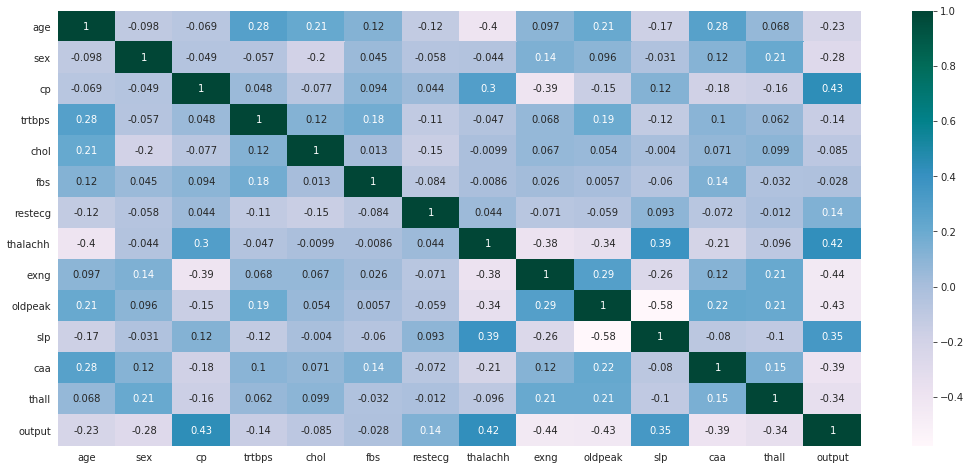

In [13]:
# Plot correlations using a heatmap
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn") 

Using 0.5 as a threshold for a moderate positive correlation, with this heatmap we can easily see there are no correlations at or above this threshold, however there are 2 relationships at -0.58, a moderate negative correlation.

We will not be investigating these correlations at this time as we already have two hypothesis to test, but it is in any event worthwhile to give this type of chart a quick review to see what jumps out.

# Visualizing the Data

For the subsequent analysis, we will be looking at the numerical columns, so we will first plot histograms for the distributions of each, with their kernel density estimate (kde) as the curve.

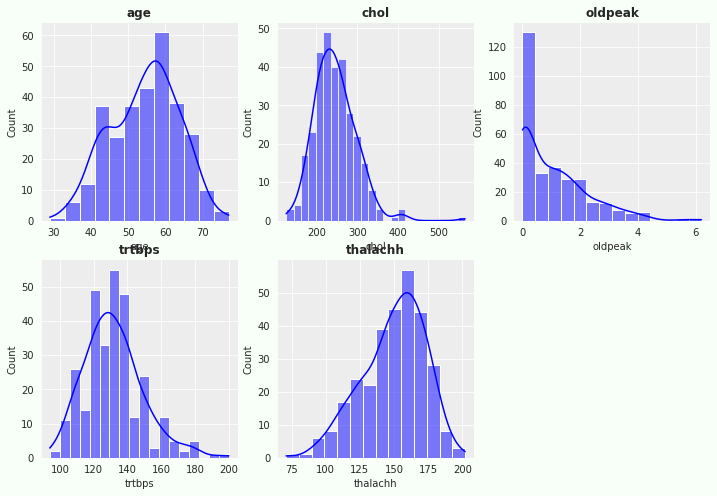

In [14]:
# Using Seaborne to plot histograms for numeric data
# Define size, area, and facecolor
fig, ax=plt.subplots(2,3,figsize=(12,8))
fig.patch.set_facecolor('#F8FFF8')
# use for loop to sequentially plot each numerical column
for i,idx in enumerate(data_numerical.columns):
    sns.histplot(ax=ax[i%2,i//2], x=data_numerical[idx], color='blue', kde=True,alpha=0.5)
    ax[i%2,i//2].set_title(idx, fontweight='bold')
    ax[i%2,i//2].set_facecolor('#EDEDEE')
# remove grid for the blank space
    for z in ["top","right"]:
        ax[i%2,i//2].spines[z].set_visible(False)
ax[1,2].set_visible(False)

And now calculate the Skewness and Kurtosis for each.

In [15]:
# Skewness and Kurtosis of the Numerical columns
s_k = []
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt = pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt.transpose()

,0,1,2,3,4
Columns,age,trtbps,chol,thalachh,oldpeak
Skewness,-0.202463,0.713768,1.1434,-0.53741,1.26972
Kurtosis,-0.542167,0.929054,4.50542,-0.0619699,1.57581


If **skewness** is < -1 or > 1, the distribution is highly skewed. 
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. 
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


**Kurtosis** is a measure of the combined sizes of the two tails.
If kurtosis is > 3, then sample distribution has heavier tails than a normal distribution.
If < 3, then the sample distributions has lighter tails than a normal distribution.

Age looks to be fairly close to a normal distribution, chol looks that it may have outliers contributing to it's higher skewness and high kurtosis. We will investigate this further. 

Let's now look closer at the age column.

We will do a Boxplot to check for outliers.

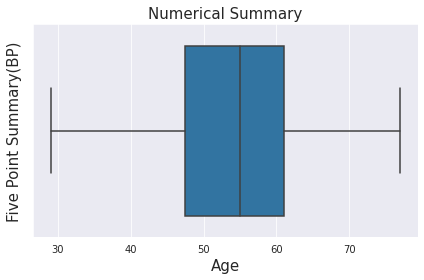

In [16]:
# Boxplot to check for outliers
plot = sns.boxplot(df['age'],orient='v')
plt.title('Numerical Summary',fontdict={'fontsize':15})
plt.xlabel('Age',fontdict={'fontsize':15})
plt.ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':15})
plt.tight_layout()

There are no outliers to remove in the age column.

Let's do a countplot of age, separating male and female.

In [17]:
# Change sex column values to male or female
df.sex.replace({0:'male',1:'female'},inplace=True)

The "sex" column values of 0 and 1 will be changed to male and female for easier readibility of the code, and for visualizations.
(Note that Python automatically re-assigns the dtype of this column from int64 to object.)

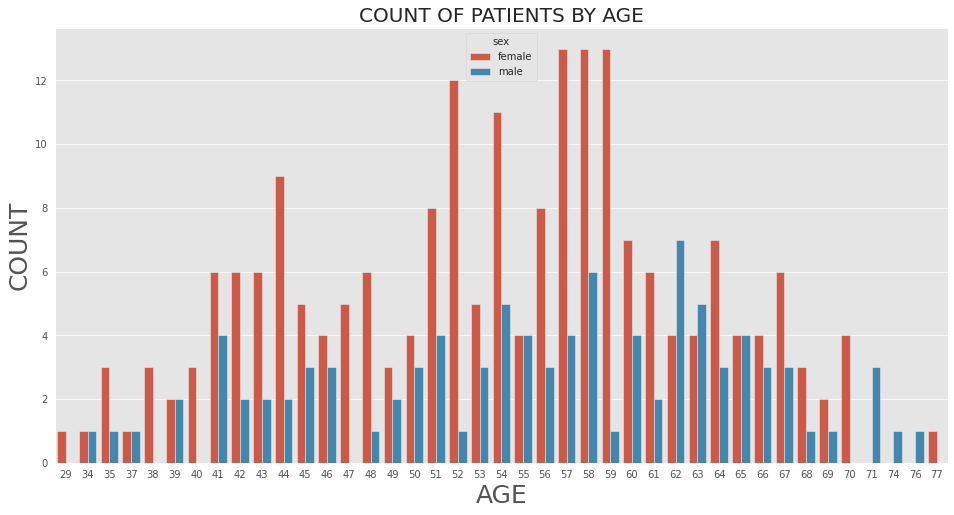

In [18]:
# Countplot of age
plt.figure(figsize=(16,8))
plt.style.use("ggplot")
sns.countplot(x=df["age"], hue = df['sex'])    
plt.title("COUNT OF PATIENTS BY AGE",fontsize=20)
plt.xlabel("AGE",fontsize=25)
plt.ylabel("COUNT",fontsize=25)
plt.show()

Hmmm. From this, it actually looks that the sub-distributions of age by sex are not equally distributed, the female sample seems to be more clustered around the median as compared to the males.

This is better demonstrated using a Seaborn distribution plot below superimposing the male and female age distributions. 

(I found this to be quite a useful and informative type of plot.)

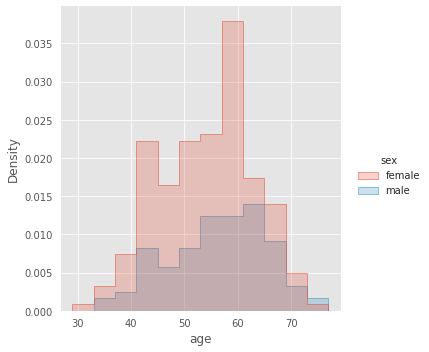

In [19]:
# Distribution of age values for male and female 
sns.displot(df, x="age", hue="sex", stat="density", element = "step")

We will create new dataframes to capture the male and female data separately.

In [20]:
# Create new dataframes to capture only male or female values
df_fem = df.loc[df['sex'] == 'female']
df_male = df.loc[df['sex'] == 'male']

In [21]:
# Check to see number of rows in each subset
print('The number of rows in the female subset is', df_fem.count()[0])
print('The number of rows in the male subset is', df_male.count()[0])

The number of rows in the female subset is 207
The number of rows in the male subset is 96


So, we have approximately twice as many females as males in this dataset.
The total adds to 303, which is as expected.

Let's do some tests for normality.

We will use the Shapiro Wilk test to test for normality of the entire age column, the male subset, and the female subset.

We will also calculate the variances using a Numpy method.

In [22]:
# Shapiro Wilk test for normality on Age, male and female
from scipy.stats import shapiro
a,b = shapiro(df['age'])
print('The Shapiro Wilk test on the age column yields a result of', round(a,4), 'with a p value of', round(b,6))

The Shapiro Wilk test on the age column yields a result of 0.9864 with a p value of 0.0058


In [23]:
# Shapiro Wilk test for normality on Age, male
from scipy.stats import shapiro
a,b = shapiro(df_male['age'])
print('The Shapiro Wilk test on the age column (male) yields a result of', round(a,4), 'with a p value of', round(b,6))

The Shapiro Wilk test on the age column (male) yields a result of 0.9795 with a p value of 0.138566


In [24]:
# Shapiro Wilk test for normality on Age, female
from scipy.stats import shapiro
a,b = shapiro(df_fem['age'])
print('The Shapiro Wilk test on the age column (female) yields a result of', round(a,4), 'with a p value of', round(b,6))

The Shapiro Wilk test on the age column (female) yields a result of 0.9861 with a p value of 0.039999


In [25]:
#find variance for each group
print('The variance for the female sample age is', round(np.var(df_fem['age']),4))
print('The variance for the male sample age is', round(np.var(df_male['age']),4))

The variance for the female sample age is 78.5407
The variance for the male sample age is 87.6145


For the grouped male and female age sample, the p value = .0058 
(<0.05) so the null hypothesis is rejected, and we conclude that the sample distribution of age is **non-normal**.

However, the male subset has a p value of .1386 and the null hypothesis is supported, this distribution is **normal**.

The female subset p value just misses the threshold, and it confirms our intuition from the previous chart that it is **not normally distributed**.


Because only one of the two subsets satisfies the criteria, we will need to use non-parametric statistical tests when comparing data columns.

The variances calculated also support what is seen on the plots, the male subset has a larger spread and therefore a larger variance.

---

# First Hypothesis

**H0(1):**
There is no increased risk of heart attack between males and females.
 
First we will create new subset dataframes for high-risk and lower-risk populations.

In [26]:
# Create new sub-dataframes for high risk (output column =1) and low risk (output column=0)
df_high = df[df['output'] == 1]
df_low = df[df['output'] == 0]


And now make a countplot for the female and male populations according to their risk stratification.

Text(0.5, 1.0, 'RISK     low: output = 0 / high: output =1')

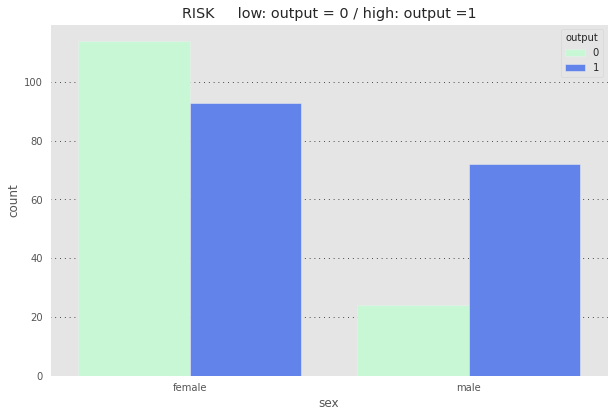

In [27]:
# Risk distribution according to gender
fig = plt.figure(figsize=(25,55))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)

ax_sex = fig.add_subplot(gs[2,1])
ax_sex.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax_sex,data=df,x='sex',palette=["#BFFFD1", "#4C77FF"], hue='output')
ax_sex.set_title('RISK     low: output = 0 / high: output =1', loc ='center')

The two sample populations appear to be different. 

To confirm this we need to perform a statistical test.
As we saw above only one of the two samples has a normal Gaussian distribution, so we will use a non-parametric test, the Mann-Whitney U test to compare them.

In [28]:
# Null Hypothesis 1: No difference in risk comparing male vs. female  
# Non parametric testing of male vs. female risk using Mann-Whitney
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_male['output'], df_fem['output'])
print('Mann-Whitney U non-parametric test')
print('Statistics = %.2f, p = %.6f' % (stat, p))

# interpret the test with an alpha of .05 for significance
alpha = 0.05
if p > alpha:
	print('\nThe two samples have the same distribution (fail to reject H0)')
else:
	print('\nThe two samples have different distributions, therefore reject null hypothesis')

Mann-Whitney U non-parametric test
Statistics = 6948.00, p = 0.000001

The two samples have different distributions, therefore reject null hypothesis


We conclude that there is a difference in risk of heart attack between the male and female populations, with the male population having an increased risk.
The null hypothesis, H0(1), is rejected.

# Second Hypothesis

**H0(2):** A chol value > 250mg/dL confers no increased risk of heart attack.

In order to investigate this hypothesis, first we will look at the distribution of the chol column more closely with a boxplot.

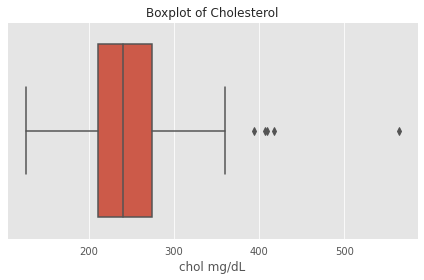

In [29]:
# Boxplot of chol column to check for outliers
plot = sns.boxplot(df['chol'],orient='v')
plt.title('Boxplot of Cholesterol',fontdict={'fontsize':12})
plt.xlabel('chol mg/dL',fontdict={'fontsize':12})
plt.tight_layout()

There are outliers, so we will remove them.


In [30]:
# Remove outliers in chol
# First define Quartiles
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
# Define IQR as the interquartile range 
IQR = Q3 - Q1    

# Removing values
filter = (df['chol'] >= Q1 - 1.5 * IQR) & (df['chol'] <= Q3 + 1.5 *IQR)
df_cholfiltered = df.loc[filter]  

In [31]:
df_cholfiltered.count()[0]

298

After removing 5 outliers, here is the new boxplot of chol column

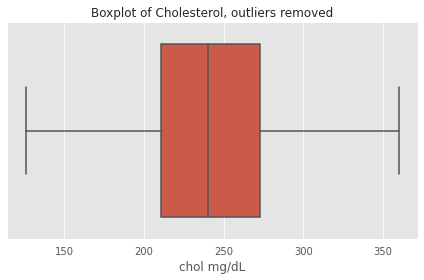

In [32]:
# Re-plot histogram after removing outliers
plot10=sns.boxplot(df_cholfiltered['chol'],orient='v')
plt.title('Boxplot of Cholesterol, outliers removed',fontdict={'fontsize':12})
plt.xlabel('chol mg/dL',fontdict={'fontsize':12})
plt.tight_layout()

Now perform the Shapiro Wilk test for normality.

In [33]:
# Shapiro Wilk test on chol after removing outliers
from scipy.stats import shapiro
a,b = shapiro(df_cholfiltered['chol'])
print('The Shapiro Wilk test on the chol column yields a result of', round(a,4), 'with a p value of', round(b,4))

The Shapiro Wilk test on the chol column yields a result of 0.993 with a p value of 0.1817


Since the p value > 0.05, we can conclude that the distribution of cholesterol in this (filtered) sample is **normal.**

However, we need to check whether the two subsamples, low chol vs. high chol, have normal distributions.

In [34]:
# Create two dataframes based on original dataframe to capture chol<250 and chol>=250
df_chol_low = df_cholfiltered.loc[df_cholfiltered['chol'] < 250]
df_chol_high = df_cholfiltered.loc[df_cholfiltered['chol'] >= 250]

from scipy.stats import shapiro
a,b = shapiro(df_chol_low['chol'])
print('Shapiro Wilk, low chol', a,b)

a,b = shapiro(df_chol_high['chol'])
print('\nShapiro Wilk, high chol', a,b)


Shapiro Wilk, low chol 0.947238564491272 4.548652213998139e-06

Shapiro Wilk, high chol 0.9394446611404419 2.9351893317652866e-05


Neither of these samples exhibits a normal distribution (as we would expect, because they each have a point of discontinuity at the level of chol = 250), and neither does the parameter we are looking at, output, which is a categorical value equal to either 0 or 1. 

We will use the non-parametric Mann Whitney U test to compare the risk of heart attack in the low chol population versus the high chol population.

In [35]:
# Non parametric testing of low chol vs. high chol risk using Mann-Whitney
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(df_chol_low['output'], df_chol_high['output'])
print('Mann-Whitney U non-parametric test')
print('Statistics = %.2f, p = %.6f' % (stat, p))


Mann-Whitney U non-parametric test
Statistics = 9386.00, p = 0.013360


The p value is .0134, smaller than our alpha of .05, so interpretation of this test tells us there is a significant difference in the risk groups. 
**The null hypothesis is rejected.**

# Conclusions

The first null hypothesis H0(1) **is not supported.**

> There is a difference in heart attack risk between the male and female population.



The second null hypothesis H0(2) **is not supported.**


> There is a difference in heart attack risk between chol <250 mg/dL and chol >= 250 mg/dL







**This is the End of the Notebook!**

Thank you for your review,

Robert